In [ ]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [36]:
df = pd.read_csv("exoplanet_data.csv")
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [37]:
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [38]:
#df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [39]:
# Set features. This will also be used as your x values.
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]

#X = df[['koi_period', 'koi_time0bk', 'koi_slogg', 'koi_srad']]
X = df.drop(['koi_disposition', 'koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec'], axis = 1)
X

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [66]:

y = df['koi_disposition']
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [67]:
from sklearn.model_selection import train_test_split


y = pd.get_dummies(y)
#y = y.drop(['CANDIDATE', 'FALSE POSITIVE'], axis = 1)
#y = np.ravel(y)
#y = y.reshape(-1, 1)
y

,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
6986,0,0,1
6987,0,0,1
6988,1,0,0
6989,0,0,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
#y_train

((5592, 36), (1399, 36), (5592, 3), (1399, 3))

In [69]:
X_test

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3602,14.032877,2.907000e-04,-2.907000e-04,138.060300,0.018500,-0.018500,0.044,0.4030,-0.0440,6.68400,...,-232,4.470,0.052,-0.208,1.001,0.318,-0.106,290.14990,41.464600,15.652
760,5.082748,8.710000e-06,-8.710000e-06,133.211760,0.001570,-0.001570,0.063,0.3910,-0.0630,1.77320,...,-108,4.555,0.018,-0.108,0.858,0.105,-0.035,290.05112,46.713371,13.984
5438,40.877842,2.140000e-06,-2.140000e-06,158.320740,0.000045,-0.000045,0.710,0.0050,-0.0050,9.88456,...,-264,3.848,0.350,-0.150,2.590,0.587,-1.091,292.35025,42.393429,11.663
750,4.880845,1.460000e-05,-1.460000e-05,136.195850,0.002530,-0.002530,0.227,0.2130,-0.2270,2.55740,...,-148,4.481,0.105,-0.560,0.861,0.135,-0.098,295.02167,46.619221,14.925
6657,424.623345,2.303000e-03,-2.303000e-03,218.259550,0.004740,-0.004740,0.819,0.0270,-0.0430,9.66600,...,-242,4.454,0.056,-0.224,1.017,0.334,-0.111,295.06592,46.686432,15.513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,1.949701,1.050000e-07,-1.050000e-07,132.426738,0.000044,-0.000044,1.153,0.0470,-0.0290,4.35014,...,-193,4.385,0.056,-0.238,1.193,0.431,-0.144,294.77219,40.459629,11.419
878,35.636402,3.715000e-04,-3.715000e-04,164.174960,0.007990,-0.007990,0.654,0.0590,-0.4770,4.88800,...,-178,4.532,0.042,-0.168,0.887,0.216,-0.077,290.24103,39.968010,15.614
6805,348.681620,1.087000e-02,-1.087000e-02,343.821000,0.020000,-0.020000,0.506,0.4490,-0.2960,10.95900,...,-192,4.386,0.067,-0.216,1.155,0.389,-0.130,284.19217,44.762112,13.971
2340,6.770676,5.730000e-05,-5.730000e-05,133.349140,0.006950,-0.006950,0.127,0.3220,-0.1270,5.98200,...,-82,3.893,0.253,-0.136,2.335,0.503,-0.755,285.92322,42.549850,11.915


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [70]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)
y_train_scaled = y_minmax.transform(y_train)
y_test_scaled = y_minmax.transform(y_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.577
k: 3, Train/Test Score: 0.759/0.572
k: 5, Train/Test Score: 0.694/0.557
k: 7, Train/Test Score: 0.654/0.555
k: 9, Train/Test Score: 0.633/0.552
k: 11, Train/Test Score: 0.609/0.542
k: 13, Train/Test Score: 0.590/0.533
k: 15, Train/Test Score: 0.583/0.528
k: 17, Train/Test Score: 0.575/0.527
k: 19, Train/Test Score: 0.568/0.518
k: 21, Train/Test Score: 0.560/0.519
k: 23, Train/Test Score: 0.552/0.508
k: 25, Train/Test Score: 0.550/0.505
k: 27, Train/Test Score: 0.544/0.500
k: 29, Train/Test Score: 0.542/0.504
k: 31, Train/Test Score: 0.539/0.500
k: 33, Train/Test Score: 0.533/0.499
k: 35, Train/Test Score: 0.530/0.497
k: 37, Train/Test Score: 0.527/0.495
k: 39, Train/Test Score: 0.526/0.497


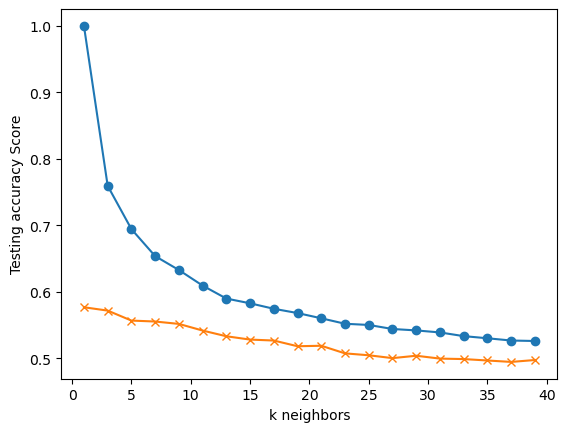

In [71]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [72]:
# Note that k: 1 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

k=1 Test Acc: 0.577
Training Data Score: 1.0
Testing Data Score: 0.5768406004288777


In [13]:
for i in range(5):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    X_minmax = MinMaxScaler().fit(X_train)
    y_minmax = MinMaxScaler().fit(y_train)

    X_train_scaled = X_minmax.transform(X_train)
    X_test_scaled = X_minmax.transform(X_test)
    y_train_scaled = y_minmax.transform(y_train)
    y_test_scaled = y_minmax.transform(y_test)
    
    train_scores = []
    test_scores = []
    for k in range(1, 40, 2):

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        train_score = knn.score(X_train_scaled, y_train)
        test_score = knn.score(X_test_scaled, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")



0
k: 1, Train/Test Score: 1.000/0.604
k: 3, Train/Test Score: 0.759/0.588
k: 5, Train/Test Score: 0.685/0.587
k: 7, Train/Test Score: 0.649/0.579
k: 9, Train/Test Score: 0.633/0.558
k: 11, Train/Test Score: 0.614/0.548
k: 13, Train/Test Score: 0.600/0.543
k: 15, Train/Test Score: 0.586/0.540
k: 17, Train/Test Score: 0.576/0.541
k: 19, Train/Test Score: 0.561/0.538
k: 21, Train/Test Score: 0.558/0.535
k: 23, Train/Test Score: 0.551/0.534
k: 25, Train/Test Score: 0.547/0.525
k: 27, Train/Test Score: 0.545/0.518
k: 29, Train/Test Score: 0.540/0.515
k: 31, Train/Test Score: 0.534/0.512
k: 33, Train/Test Score: 0.532/0.512
k: 35, Train/Test Score: 0.528/0.508
k: 37, Train/Test Score: 0.524/0.503
k: 39, Train/Test Score: 0.521/0.502
1
k: 1, Train/Test Score: 1.000/0.593
k: 3, Train/Test Score: 0.759/0.573
k: 5, Train/Test Score: 0.692/0.568
k: 7, Train/Test Score: 0.660/0.549
k: 9, Train/Test Score: 0.634/0.560
k: 11, Train/Test Score: 0.613/0.554
k: 13, Train/Test Score: 0.596/0.549
k: 15, 

In [14]:
# Note that k: 1 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

k=1 Test Acc: 0.588
Training Data Score: 1.0
Testing Data Score: 0.588277340957827


In [16]:
y_test

,CANDIDATE,CONFIRMED,FALSE POSITIVE
4125,0,0,1
2288,1,0,0
5931,1,0,0
1811,1,0,0
3829,0,1,0
...,...,...,...
2196,0,1,0
3506,0,0,1
3047,0,0,1
1297,1,0,0


In [17]:
#predictions

NameError: name 'predictions' is not defined

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [21]:
# Create the GridSearchCV model
# Create the SVC Model
#SVC - Support vector classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
#model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3, return_train_score=True)

In [22]:
# Train the model with GridSearch
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .C=1, gamma=0.0001;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END .C=1, gamma=0.0001;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END .C=1, gamma=0.0001;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END .C=1, gamma=0.0001;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END .C=1, gamma=0.0001;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END .C=1, gamma=0.0005;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END .C=1, gamma=0.0005;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END .C=1, gamma=0.0005;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END .C=1, gamma=0.0005;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END .C=1, gamma=0.0005;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.001;, score=(train=n

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 883, in check_X_y
    y = column_or_1d(y, warn=True)
  File "/opt/anaconda3

ValueError: y should be a 1d array, got an array of shape (5592, 3) instead.

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
nan


In [27]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [26]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

NameError: name 'predictions' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)